In [60]:
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

# Hard margin classification

In [61]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()

X = iris["data"][:, (2, 3)] 
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)

X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

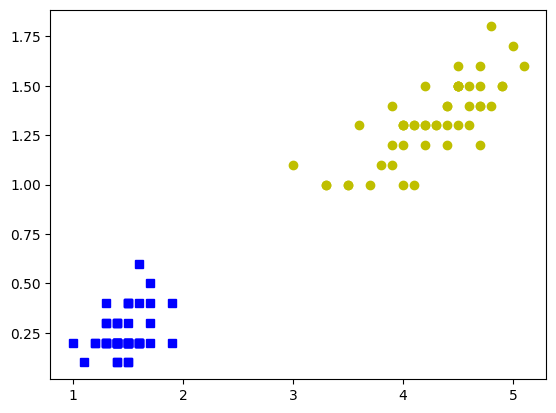

In [62]:
plt.plot(X[:,0][y==0], X[:, 1][y==0], 'bs')
plt.plot(X[:,0][y==1], X[:, 1][y==1], 'yo')
plt.show()

## SVM model

In [63]:
from sklearn.svm import SVC

svm_clf = SVC(kernel="linear", C=1e100)
svm_clf.fit(X, y)

SVC(C=1e+100, kernel='linear')

In [64]:
svm_clf.intercept_, svm_clf.coef_

(array([-3.78823471]), array([[1.29411744, 0.82352928]]))

## prediction

In [67]:
X_new = [[1.5, 0.25], [3, 1]]

svm_clf.predict(X_new)

array([0, 1])

In [68]:
svm_clf.decision_function(X_new)

array([-1.64117624,  0.91764688])

# Soft margin linear SVM classification

In [69]:
iris = datasets.load_iris()

X = iris["data"][:, (2, 3)] 
y = iris["target"]

class_1_2 = (y == 1) | (y == 2)

X = X[class_1_2]
y = y[class_1_2]
y = (y == 2).astype(np.float64)
# y = (iris["target"] == 2).astype(np.float64)

y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

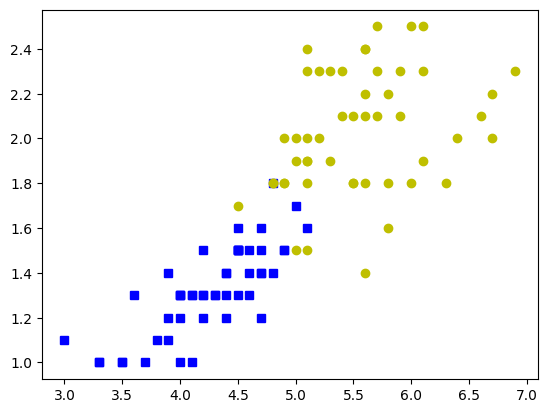

In [70]:
plt.plot(X[:,0][y==0], X[:, 1][y==0], 'bs')
plt.plot(X[:,0][y==1], X[:, 1][y==1], 'yo')
plt.show()

In [71]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

svm_clf_soft = SVC(kernel="linear", C = 10)

svm_clf_soft.fit(X_std, y)

SVC(C=10, kernel='linear')

In [ ]:
X_new = [[3, 1.5], [2, 0.5], [0, 0], [7, 2], [5, 2]]

X_new_std = scaler.transform(X_new)

svm_clf_soft.predict(X_new_std)

array([0., 0., 1., 0., 1.])